In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [26]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-04-25 19:57:26--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  6.69MB/s    in 31s     

2020-04-25 19:57:57 (7.66 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [29]:
import cv2
import numpy as np
!ls
!https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

darknet  darknet53.conv.74  gdrive  sample_data  yolov3.weights
/bin/bash: https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names: No such file or directory


In [0]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "./darknet/cfg/yolov3.cfg")
classes = []
with open("./darknet/data/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [33]:
! wget https://unsplash.com/photos/xRKcHoCOA4Y/download?force=true&w=640
!ls

--2020-04-25 20:08:03--  https://unsplash.com/photos/xRKcHoCOA4Y/download?force=true
Resolving unsplash.com (unsplash.com)... 151.101.65.181, 151.101.1.181, 151.101.193.181, ...
Connecting to unsplash.com (unsplash.com)|151.101.65.181|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://images.unsplash.com/photo-1507461476191-0ed4f9f18533?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&dl=will-shirley-xRKcHoCOA4Y-unsplash.jpg [following]
--2020-04-25 20:08:03--  https://images.unsplash.com/photo-1507461476191-0ed4f9f18533?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&dl=will-shirley-xRKcHoCOA4Y-unsplash.jpg
Resolving images.unsplash.com (images.unsplash.com)... 151.101.250.208, 2a04:4e42:3b::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.250.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1686552 (1.6M) [image/jpeg]
Saving to: ‘download?force=true.1’

download?force=true 100%[================

In [0]:
# Loading image
img = cv2.imread("./darknet/sandeep.jpeg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [42]:
!wget https://img.buzzfeed.com/buzzfeed-static/static/2017-07/13/17/campaign_images/buzzfeed-prod-fastlane-03/this-guy-wants-coca-cola-to-stop-using-his-tradem-2-22597-1499982822-7_dblbig.jpg

--2020-04-25 20:21:38--  https://img.buzzfeed.com/buzzfeed-static/static/2017-07/13/17/campaign_images/buzzfeed-prod-fastlane-03/this-guy-wants-coca-cola-to-stop-using-his-tradem-2-22597-1499982822-7_dblbig.jpg
Resolving img.buzzfeed.com (img.buzzfeed.com)... 151.101.2.114, 151.101.66.114, 151.101.130.114, ...
Connecting to img.buzzfeed.com (img.buzzfeed.com)|151.101.2.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57169 (56K) [image/jpeg]
Saving to: ‘this-guy-wants-coca-cola-to-stop-using-his-tradem-2-22597-1499982822-7_dblbig.jpg’

this-guy-wants-coca 100%[===================>]  55.83K  --.-KB/s    in 0.02s   

2020-04-25 20:21:39 (2.24 MB/s) - ‘this-guy-wants-coca-cola-to-stop-using-his-tradem-2-22597-1499982822-7_dblbig.jpg’ saved [57169/57169]



In [0]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [0]:
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [0]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

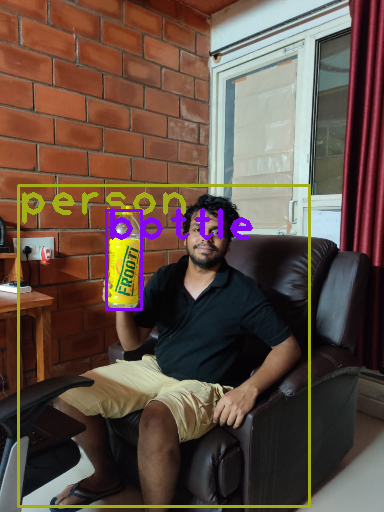

In [52]:
from google.colab.patches import cv2_imshow
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()